Predict Closing Stock Price For Apple Combany using the past 60 days stock price. 
using artificial neural network  (LSTM)

In [39]:
#Import the libraries 
import math
import pandas as pd 
import pandas_datareader as web 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt

In [40]:
#Get the stock quote 
yf.pdr_override()
stockes = ['AAPL']
start_date = dt.datetime(2001,2,1)
end_date = dt.datetime(2022,9,30)
df = pdr.get_data_yahoo(stockes, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-02-01,0.369420,0.383929,0.366071,0.377232,0.321559,369695200
2001-02-02,0.377232,0.391741,0.366071,0.368304,0.313949,427341600
2001-02-05,0.366071,0.367188,0.352679,0.360491,0.307289,286115200
2001-02-06,0.359933,0.381975,0.357143,0.377232,0.321559,462711200
2001-02-07,0.368862,0.372768,0.353795,0.370536,0.315851,393887200
...,...,...,...,...,...,...
2022-09-23,151.190002,151.470001,148.559998,150.429993,150.180862,96029900
2022-09-26,149.660004,153.770004,149.639999,150.770004,150.520309,93339400
2022-09-27,152.740005,154.720001,149.949997,151.759995,151.508667,84442700


In [41]:
#get the number of rows and columns of the dataset 
df.shape 
x = np.average(df['Close'])
y = np.average(df['Open'])
z = np.average(df['Adj Close'])

pie_Data = np.array([x,y,z])
pie_labels = ["Close","Open","Adj Close"]
print(x,y,z)

30.092173151715635 30.077391126046486 28.840332383633754


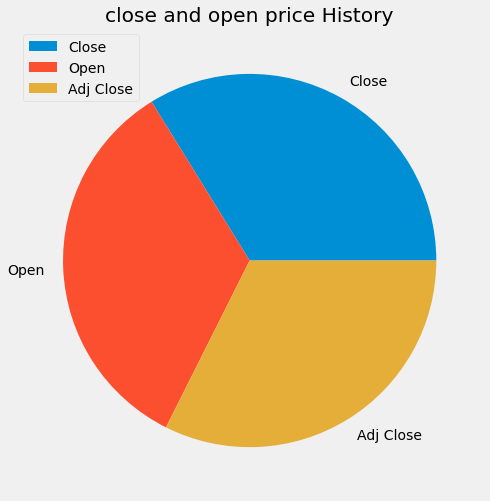

In [42]:
plt.figure(figsize=(16,8))
plt.pie(pie_Data, labels=pie_labels)
plt.title('close and open price History')

plt.legend()
plt.show()

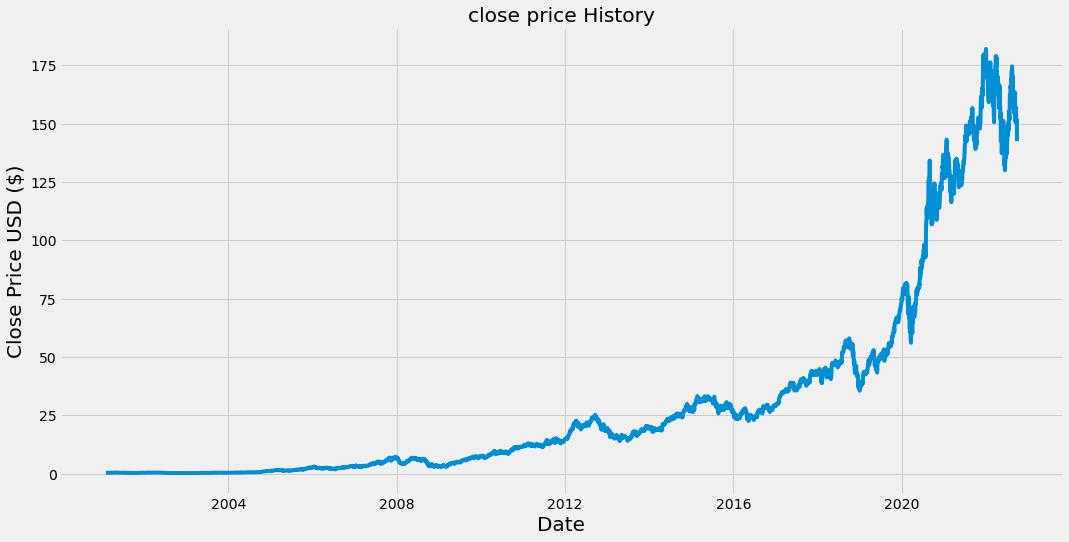

In [43]:
#Visulize the closing price history(اعملهم جراف)
plt.figure(figsize=(16,8))
plt.title('close price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()
#traaaaaaaaaa

In [44]:
#Create a new dataframe with only the 'Closse' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array (هنحول الداتا فرام بتاعتنا لي اراي)
dataset = data.values 
#Get the number of rows to train the model on (هنعمل فاريبل نعمل train للدادتا عليه و هنعمل train على 80% منه بس)
#len: Return the number of items in a container 
training_data_len = int(math.ceil(len(dataset)) * .8)
#that would give us only 80% and to round up we use ciel
training_data_len 
#print the lenght of our training dataset

4360

In [45]:
#scale  the data (we use scaleing or normaliztion or pre-processing it's all a good practise to the input data before it's presented)
#helps the model 
scaler = MinMaxScaler(feature_range=(0,1))
#know let's transform the data between values 0 and 1 
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[7.86386647e-04],
       [7.37271333e-04],
       [6.94289755e-04],
       ...,
       [8.33586125e-01],
       [8.23023668e-01],
       [7.82534206e-01]])

In [46]:
#Create the training dataset 
#Crete the scaled trining data set 
train_data = scaled_data[0:training_data_len , : ]
#هنا احنا عملنا فاريبل الفاريبل ده هيبداء ياخد داتا من اول 0 وال: دول معناهم ان لحد اخر الداتا

#Split the data into x_train and y_train data sets 
x_train = [] #indepndent variables (input)
y_train = [] #dependent variables or target (output)

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])# from 0 to 59
    y_train.append(train_data[i,0])#60 first value that we want our model to predict
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00078639, 0.00073727, 0.00069429, 0.00078639, 0.00074955,
       0.00074955, 0.00058991, 0.00064517, 0.00058991, 0.00062675,
       0.00068201, 0.00057763, 0.0005101 , 0.00056536, 0.00055922,
       0.00055922, 0.00062675, 0.00061447, 0.00050396, 0.00055307,
       0.00060219, 0.00071271, 0.00082323, 0.00079867, 0.00075569,
       0.00070043, 0.00054079, 0.00063289, 0.00071885, 0.00064517,
       0.00063903, 0.00073113, 0.00064517, 0.00068815, 0.00083551,
       0.00097058, 0.00085074, 0.00095781, 0.00088905, 0.00092441,
       0.00087922, 0.00083207, 0.00069945, 0.00062675, 0.00076134,
       0.00073383, 0.00072892, 0.00087627, 0.0008527 , 0.0009136 ,
       0.00081733, 0.00071517, 0.00094995, 0.00123779, 0.00117099,
       0.00109338, 0.00107177, 0.00113955, 0.0011366 , 0.00128494])]
[0.0012151954312594677]

[array([0.00078639, 0.00073727, 0.00069429, 0.00078639, 0.00074955,
       0.00074955, 0.00058991, 0.00064517, 0.00058991, 0.00062675,
       0.00068201, 0.00057763, 0.

In [47]:
#Convert the x_train and y_trian to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [48]:
#Reshape the data
#(LSTM expect the data to 3-dimentional shqpe)
#x_train.shape[0] = number of samples(row in the dataset[2113]),x_train.shape[1]=time of step(at this case we will take 60 columns per step),1 = the number of fetures(the output the close price)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape 

(4300, 60, 1)

In [49]:
#Build the LSTM model 
model = Sequential()
#first layer in the model arctcture retur_seq = True because it wil had another layer and 50 is the number of neurens
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
#2nd layer
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
#على الأغلب كل لاير من النيورنز اللي في الدينس بياخد input من الlayer اللي قبله 
model.add(Dense(1))

In [50]:
#Complie the model 
model.compile(optimizer='adam', loss='mean_squared_error')
#adams optimizer is used to improve the loss function and the loss function is used to mesure how will the model did on training

In [51]:
#Train the model 
#fit is another name for train 
#batch_size is the total number of training examples present is a single batch
#epoches is the number of iterations on the entire dataset
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
4300/4300 [==============================] - 93s 21ms/step - loss: 7.1056e-05
Epoch 2/4
4300/4300 [==============================] - 91s 21ms/step - loss: 3.4870e-05
Epoch 3/4
4300/4300 [==============================] - 91s 21ms/step - loss: 1.8555e-05
Epoch 4/4
4300/4300 [==============================] - 90s 21ms/step - loss: 1.7566e-05


In [52]:
#Create the testing data set 
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :] #all the columns
#Create the data sets x_test and y_test
#y_test well be all the values that we want our model to predict 
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [53]:
#Convert the data to a numoy array 
x_test = np.array(x_test)

In [54]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape

(1090, 60, 1)

In [55]:
#Get the models predicted price values
#we want predictions to have the same values of y_test data set based of x_test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

35/35 [==============================] - 1s 12ms/step


In [56]:
#Get the root mean squared error (RMSE) it is used for evalute the model 
#the lower the (RMSE) indicates a better fit 
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.7552143236912718

C:\Users\nooro\AppData\Local\Temp/ipykernel_11476/2132234147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


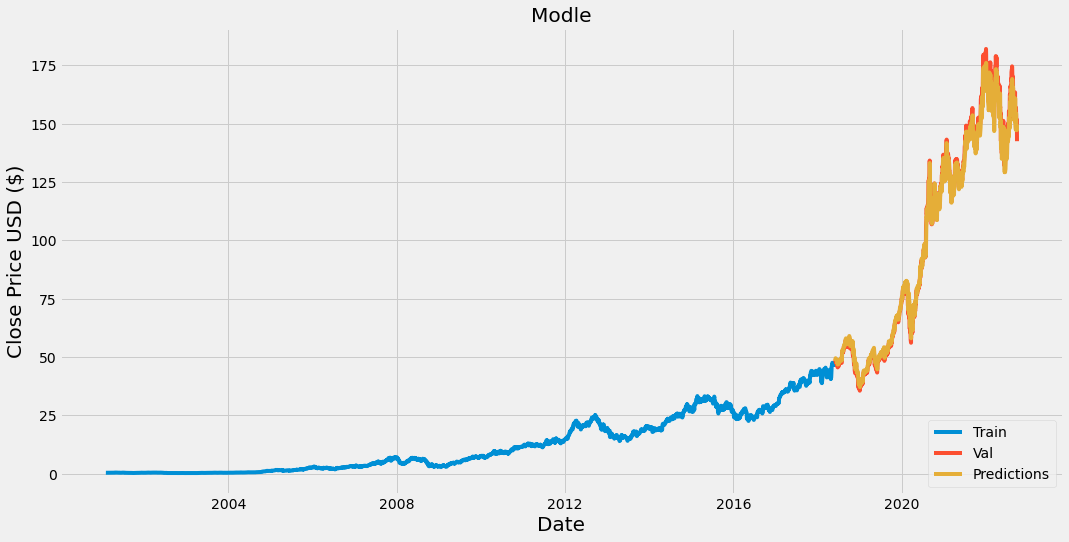

In [57]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Modle')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [58]:
#the blue up there is the 80% of data that the model was trained on 
#the Val is the actual values for the rest of these days 
#the orange is our predictions 

In [59]:
#Show the valid and the predicted prices 
valid 

,Close,Predictions
Date,,
2018-06-04,47.957500,48.482796
2018-06-05,48.327499,48.953045
2018-06-06,48.494999,49.315289
2018-06-07,48.365002,49.469486
2018-06-08,47.924999,49.332066
...,...,...
2022-09-23,150.429993,149.516647
2022-09-26,150.770004,147.205887
2022-09-27,151.759995,147.703140


In [60]:
#Get the quote (هنجيب الداتا و نحسب البردكشنز عليها بنفس المودل بس لي 01-09-2022)
apple_Stock = pdr.get_data_yahoo(stockes, start=start_date, end=end_date)
#Create a new dataframe
new_df = apple_Stock.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
Last_60_Days = new_df[-60:].values
#Scale the data to be to be values between 0 and 1 
Last_60_Days_scaled = scaler.transform(Last_60_Days)# we are useing fit transform because we want to the same amount minmax that we use first
#Create an empty list 
x_test = []
#Append the past 60 days to x_test 
x_test.append(Last_60_Days_scaled)
#Convert the x_test to np array 
x_test = np.array(x_test)
#Reshape the data 
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
#GET predicted scale price 
predict_price = model.predict(x_test)
#undo the scaling to see the real number
predict_price = scaler.inverse_transform(predict_price)
print(predict_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 31ms/step
[[139.49007]]


In [61]:
#134.28238 this is the predicted price for 02/09 and real price was, 2022-09-02    155.809998
apple_Stock2 = pdr.get_data_yahoo(stockes, start=start_date, end=end_date)
print(apple_Stock2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2001-02-01      0.377232
2001-02-02      0.368304
2001-02-05      0.360491
2001-02-06      0.377232
2001-02-07      0.370536
                 ...    
2022-09-23    150.429993
2022-09-26    150.770004
2022-09-27    151.759995
2022-09-28    149.839996
2022-09-29    142.479996
Name: Close, Length: 5450, dtype: float64
